# **Deskripsi Project**



---


Project ini merupakan sebuah project untuk memenuhi nilai UTS (Ujian Tengah Semester) pada mata kuliah Data Mining. Hasil dari project ini yaitu sebuah interface berbasis web yang dapat digunakan untuk memprediksi kelas dari kasus yang diambil. Kasus yang diambil adalah sebuah kasus dari Dataset Mushroomsyang diperoleh dari UCI Machine Leaning. Algoritma yang dibandingkan untuk mendapatkan model terbaik adalah DT,NB,KNN,SVM, RL, dan ANN. Kemudian memilih hasil perbandingan model terbaik yang akan digunakan untuk membangun aplikasi. Library yang digunakan untuk deployment pada project ini adalah Streamlit.




#**Pre-Processing**

In [ ]:
#Import dan Read Data
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive')
df = ['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat' ]
df = pd.read_csv('/content/drive/MyDrive/dataset/agaricus-l.data', header=None, names=df)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
#Mengubah Semua Data Menjadi Angka
from sklearn.preprocessing import LabelEncoder

mappings = list ()
encoder = LabelEncoder()
for column in range(len(df.columns)):
  df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]])
  mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
  mappings.append(mappings_dict)

df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
#Mendefinisikan Target (y) dan Fitur (X)
y = df['poisonous']
X = df.drop('poisonous', axis = 1)
X.tail()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
8123,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,4,1,2


In [ ]:
#Standarisasi/Normalisasi
from sklearn.preprocessing import MinMaxScaler

print('Data Sebelum Normalisasi :')
print(df)

scaler =  MinMaxScaler()
scaler.fit (df)
df_ternormalisasi = scaler.transform(df)

print('Data Setalah Normalisasi')
print(df_ternormalisasi)

Data Sebelum Normalisasi :
      poisonous  cap-shape  cap-surface  cap-color  bruises  odor  \
0             1          5            2          4        1     6   
1             0          5            2          9        1     0   
2             0          0            2          8        1     3   
3             1          5            3          8        1     6   
4             0          5            2          3        0     5   
...         ...        ...          ...        ...      ...   ...   
8119          0          3            2          4        0     5   
8120          0          5            2          4        0     5   
8121          0          2            2          4        0     5   
8122          1          3            3          4        0     8   
8123          0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1         

In [ ]:
#Penanganan Data Duplikat
duplicate = df.duplicated()
print("Data Duplikat")
print(df[df.duplicated(keep=False)])

Data Duplikat
Empty DataFrame
Columns: [poisonous, cap-shape, cap-surface, cap-color, bruises, odor, gill-attachment, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, veil-type, veil-color, ring-number, ring-type, spore-print-color, population, habitat]
Index: []

[0 rows x 23 columns]


In [ ]:
#Penanganan Data Hilang (Missing Value)
missing_value = df.isnull().sum()
print("Banyak Missing Value: ")
print (missing_value)

df_cleaned = df.dropna()
print (f"Sebelum Menghapus Missing Value : {len(df)}")
print (f"Setelah Menghapus Missing Value: {len(df_cleaned)}")

Banyak Missing Value: 
poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
Sebelum Menghapus Missing Value : 8124
Setelah Menghapus Missing Value: 8124


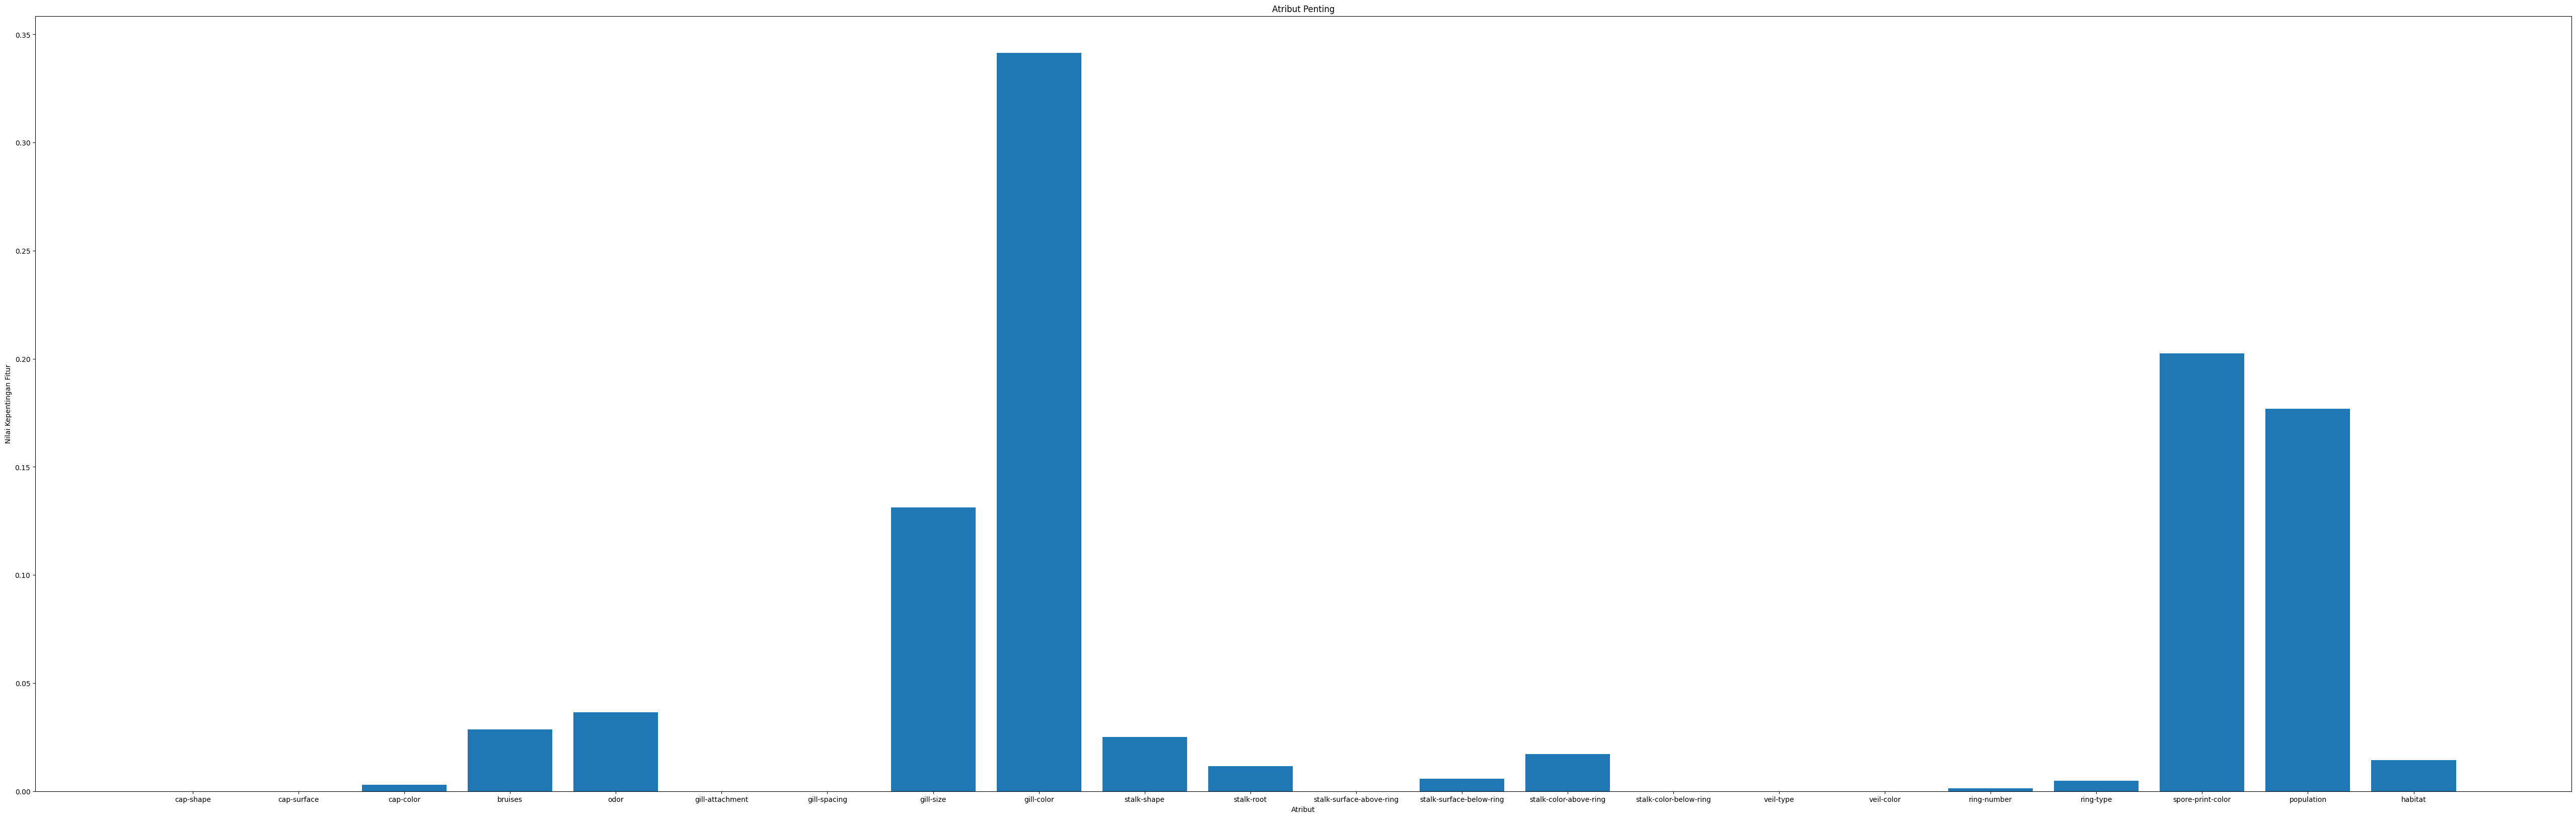

In [ ]:
#Pemilihan FItur/Atribut Penting
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

y = df['poisonous']
X = df.drop('poisonous', axis = 1)

model = DecisionTreeRegressor()

model.fit(X, y)

feature_importances = model.feature_importances_

plt.figure(figsize=(65,20))
plt.bar(X.columns, feature_importances)
plt.xlabel('Atribut')
plt.ylabel('Nilai Kepentingan Fitur')
plt.title('Atribut Penting')
plt.show()

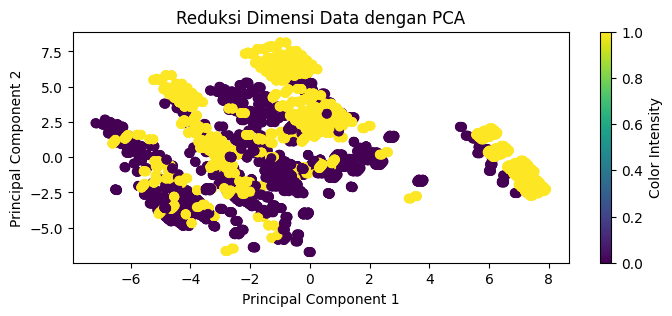

In [ ]:
#Reduksi Dimensi Data
from sklearn.decomposition import PCA

#Pemisalan Apabila Dilakukan Pengurangan Menjadi 5 Komponen Utama
pca = PCA(n_components=5)

X_reduced = pca.fit_transform(X)

plt.figure(figsize=(8,3))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Reduksi Dimensi Data dengan PCA')
plt.colorbar(label='Color Intensity')
plt.show()

In [ ]:
#Resampling Data Kelas yang Tidak Seimbang
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

oversampler = RandomOverSampler(random_state=50)
undersampler = RandomUnderSampler()

X_resampled, y_resampled  = oversampler.fit_resample(X, y)

print("Jumlah Class yang Dilakukan Resampling: ")
print(pd.Series(y_resampled).value_counts())
print('\n')
resampled_data = pd.DataFrame(data=X_resampled, columns=X.columns)
resampled_data['poisonous'] = y_resampled
print(resampled_data)

Jumlah Class yang Dilakukan Resampling: 
1    4208
0    4208
Name: poisonous, dtype: int64


      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             5            2          4        1     6                1   
1             5            2          9        1     0                1   
2             0            2          8        1     3                1   
3             5            3          8        1     6                1   
4             5            2          3        0     5                1   
...         ...          ...        ...      ...   ...              ...   
8411          3            3          2        0     8                1   
8412          2            3          3        0     2                1   
8413          3            2          4        0     2                1   
8414          2            3          9        0     2                1   
8415          2            3          2        0     8                1   

      

#**Decision Tree (DT)**

In [ ]:
#Pembagian Dataset menjadi Training Set dan Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

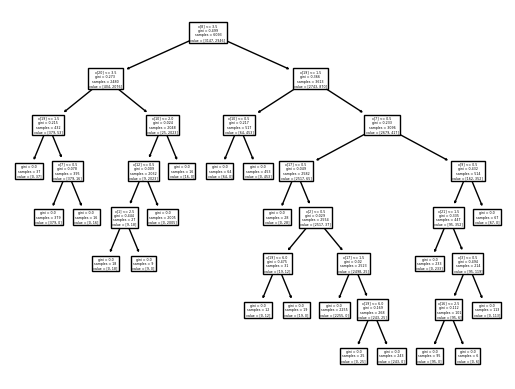

In [ ]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

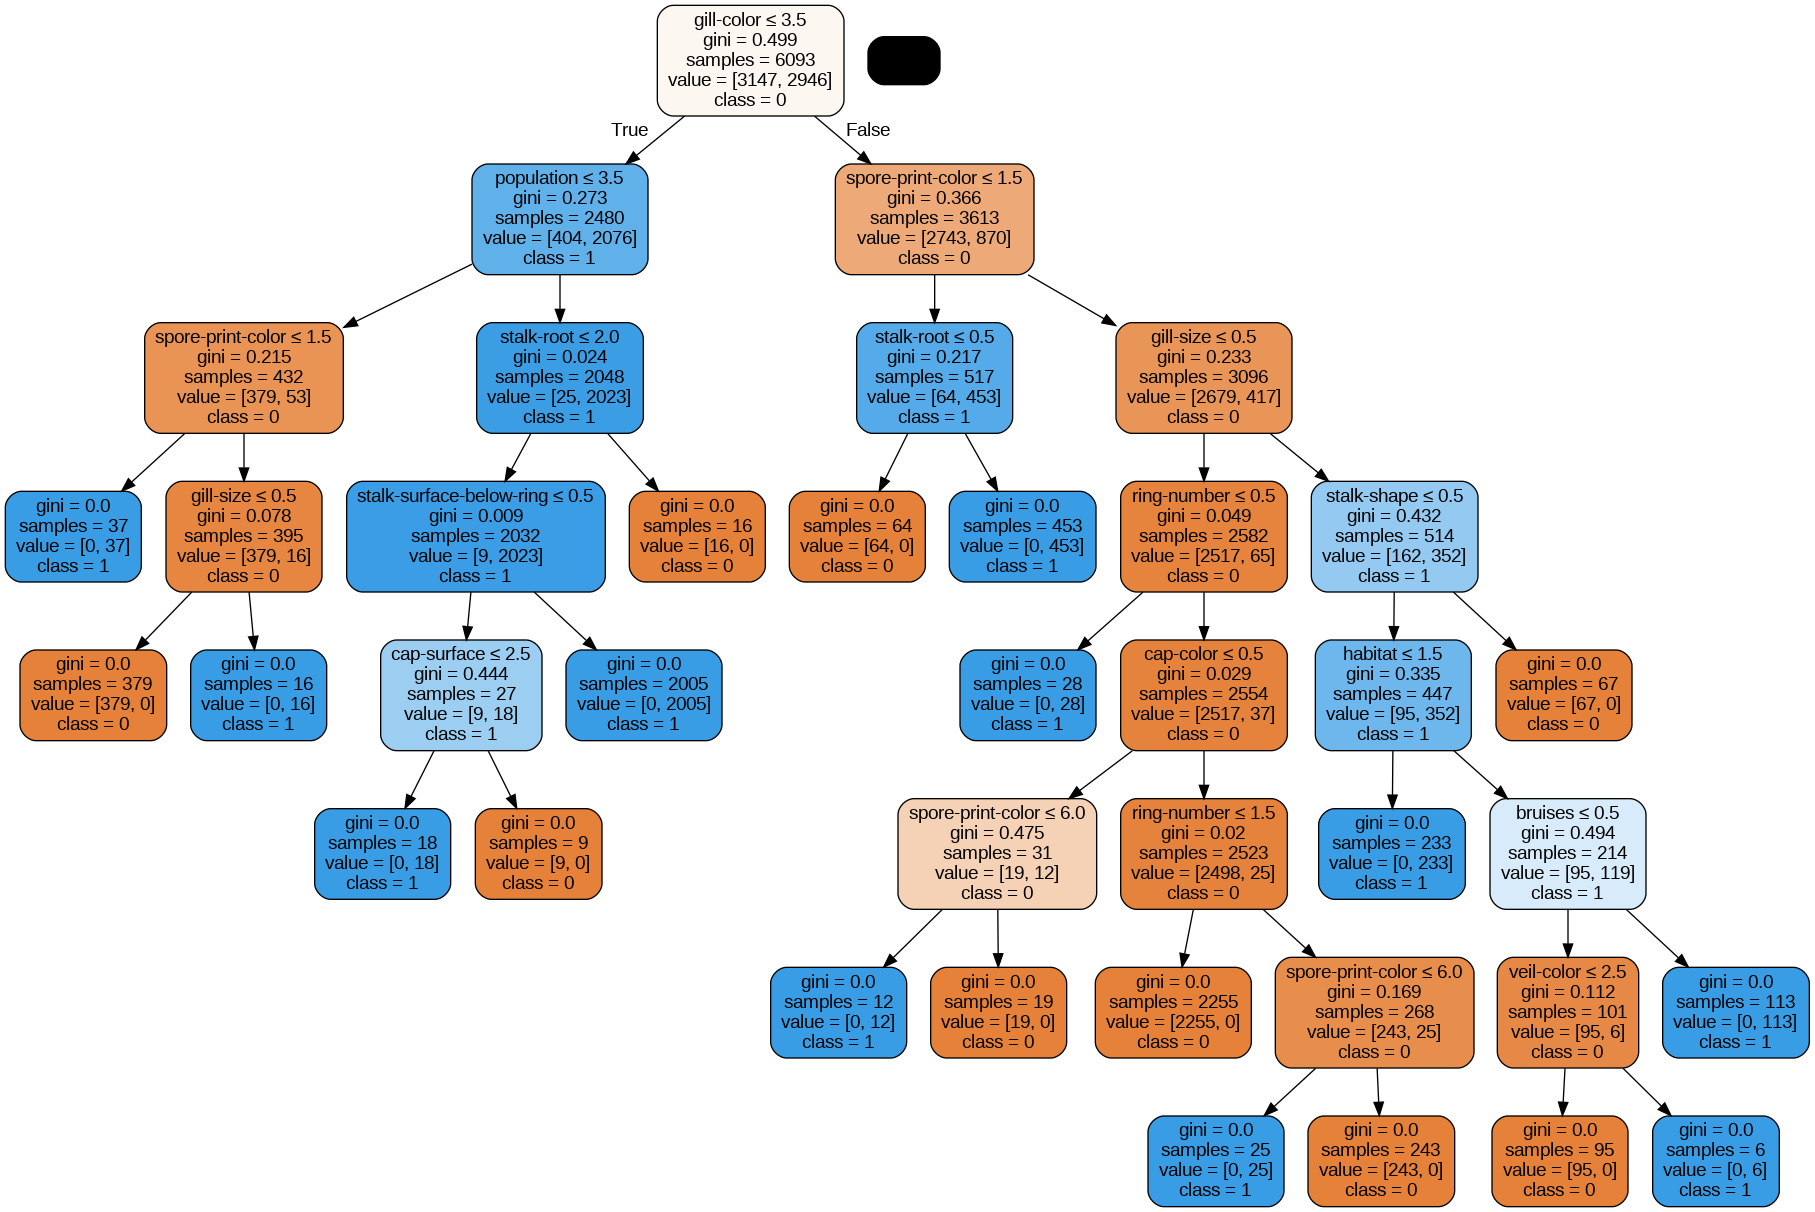

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_names = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat' ]
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
#Metode Gini 70% 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
#Metode Entropy 70% 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9737489745693191


In [ ]:
#Metode Classification Error 70% 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="log_loss", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9737489745693191


In [ ]:
#Metode Gini 80% 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
#Metode Entropy 80% 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9735384615384616


In [ ]:
#Metode Classification Error 80% 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="log_loss", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9735384615384616


In [ ]:
#Metode Gini 90% 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
#Metode Entropy 90% 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.974169741697417


In [ ]:
#Metode Classification Error 90% 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="log_loss", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.974169741697417


In [ ]:
#Evaluasi Model DT
from sklearn import datasets
from sklearn import svm

X.shape, y.shape

((8124, 22), (8124,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, y_train.shape

((5686, 22), (5686,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_test.shape, y_test.shape

((2438, 22), (2438,))

In [ ]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9639048400328137

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape

((6499, 22), (6499,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test.shape, y_test.shape

((1625, 22), (1625,))

In [ ]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9809230769230769

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train.shape, y_train.shape

((7311, 22), (7311,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_test.shape, y_test.shape

((813, 22), (813,))

In [ ]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.977859778597786

In [ ]:
#Evaluasi Cross Validation
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear', C=1, random_state=0)
score = cross_val_score(clf, X, y, cv=3)
score

array([0.72710487, 0.92466765, 0.82348597])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.83 accuracy with a standard deviation of 0.08


In [ ]:
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear', C=1, random_state=0)
score = cross_val_score(clf, X, y, cv=4)
score

array([0.74790743, 0.95076317, 0.94485475, 0.76415559])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.85 accuracy with a standard deviation of 0.10


In [ ]:
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear', C=1, random_state=0)
score = cross_val_score(clf, X, y, cv=5)
score

array([0.78584615, 0.98523077, 0.88      , 0.99815385, 0.70935961])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.87 accuracy with a standard deviation of 0.11


In [ ]:
#F1 Score DT
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       851
           1       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



#**K-NEAREST NEIGHBOUR**

In [ ]:
#Evaluasi Model KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate,cross_val_score
model=KNeighborsClassifier(n_neighbors=43, weights='distance')

X = df.drop('poisonous', axis = 1)
y = df['poisonous']

cv_score1=cross_validate(model,X,y,cv=5, return_train_score=True)
cv_score2=cross_val_score(model,X,y,cv=10)

In [ ]:
print (cv_score1['train_score'].mean(), cv_score1['test_score'].mean())

1.0 0.8770125047366427


In [ ]:
print(cv_score2.mean()) #test_score

0.9331714019110635


In [ ]:
#Inisialisasi
def knn_predict(k) :
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_validate(model,X,y,cv=10, return_train_score=True)
    train_score = score['train_score'].mean()
    test_score = score['test_score'].mean()
    return train_score, test_score

In [ ]:
#Tuning Hyperparameter KNN manual
train_scores=[]
test_scores=[]
for k in range (2,100):
    train_score, test_score=knn_predict(k)
    train_scores.append(train_score)
    test_scores.append(test_score)

<function matplotlib.pyplot.show(close=None, block=None)>

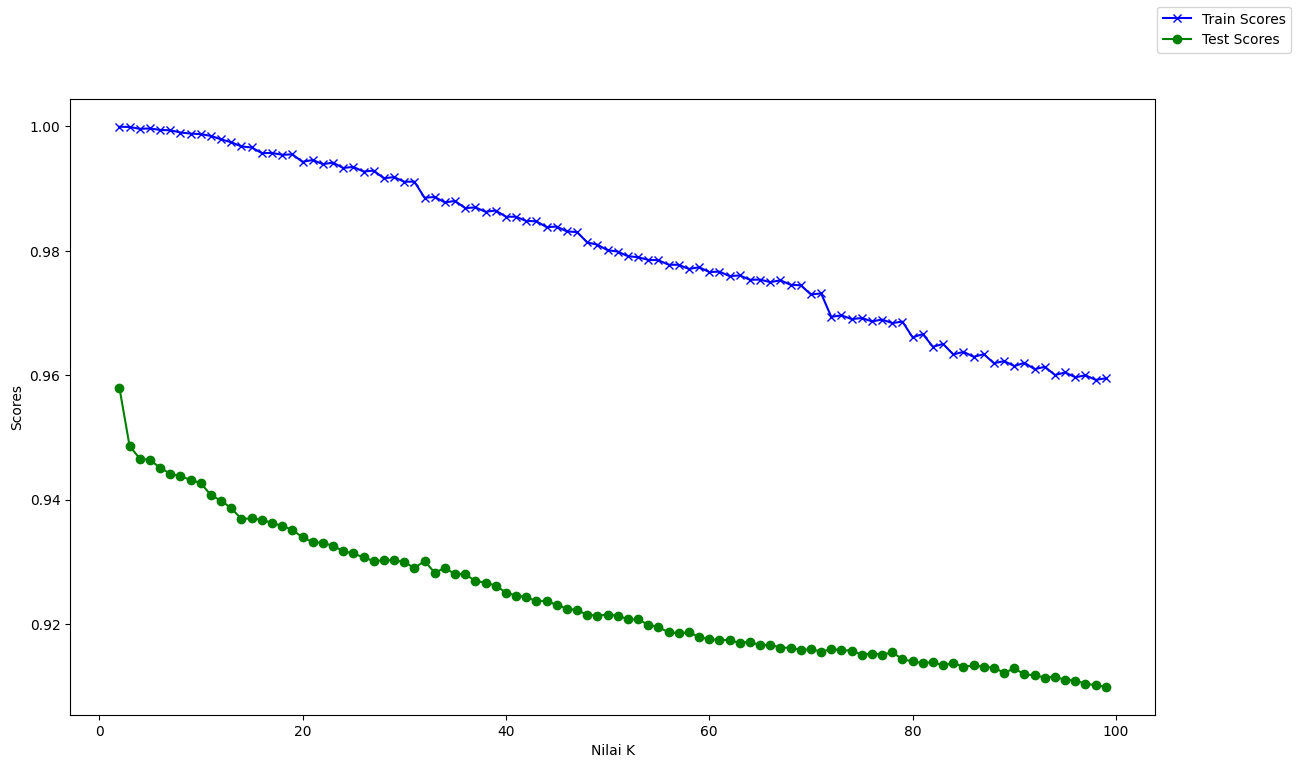

In [ ]:
#Hasil Inisialisasi
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(14,8))
ax.plot(range(2,100),train_scores, marker='x', color='b', label='Train Scores')
ax.plot(range(2,100),test_scores, marker='o', color='g', label='Test Scores')
ax.set_xlabel('Nilai K')
ax.set_ylabel('Scores')
fig.legend()
plt.show

In [ ]:
#Identifikasi Model KNN dengan dengan GridSearchCV
#Tuning Hyperparameter KNN otomatis dengan GridSearchCV
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(5,50),'weights':['distance','uniform']}
gscv=GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5)
gscv.fit(X,y)
print(gscv.best_params_,gscv.best_score_)

{'n_neighbors': 9, 'weights': 'distance'} 0.8884519893899204


In [ ]:
#Tuning Hyperparameter KNN otomatis dengan RandomGridSearchCV , default iter =10
from sklearn.model_selection import RandomizedSearchCV
model = KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(5,50),'weights':['distance','uniform']}
rscv=RandomizedSearchCV(model, param_grid,n_iter=15, scoring='accuracy', cv=5)
rscv.fit(X,y)
print(rscv.best_params_, rscv.best_score_)

In [ ]:
#F1 Score KNN
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


#**Naive Bayes (NB)**

In [ ]:
#Evaluasi Model NB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate,cross_val_score
model=GaussianNB()

y = df['poisonous']
X = df.drop('poisonous', axis = 1)

cv_score1=cross_validate(model,X,y,cv=5, return_train_score=True)
cv_score2=cross_val_score(model,X,y,cv=10)

In [ ]:
print (cv_score1['train_score'].mean(), cv_score1['test_score'].mean())

0.8971892149088025 0.7259685486926866


In [ ]:
print(cv_score2.mean()) #test_score

0.8463860057319785


In [ ]:
#Identifikasi Model NB
#Tuning Hyperparameter
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=3, random_state=999)
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
from sklearn.model_selection import GridSearchCV
gs_NB = GridSearchCV(estimator=model, param_grid=param_grid_nb, cv=cv_method,verbose=1,scoring='accuracy')
gs_NB.fit(X,y)
print(gs_NB.best_params_,gs_NB.best_score_)

Fitting 30 folds for each of 100 candidates, totalling 3000 fits
{'var_smoothing': 0.0002310129700083158} 0.9293025688877578


In [ ]:
#F1 Score NB
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 0)

model = GaussianNB()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1061
           1       0.90      0.92      0.91       970

    accuracy                           0.91      2031
   macro avg       0.91      0.91      0.91      2031
weighted avg       0.91      0.91      0.91      2031



In [ ]:
#Reduksi Dimensi dengan PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=3)
reduced = pca.fit_transform(X)
fix_reduced = pd.DataFrame(reduced, columns=['PCA 1', 'PCA 2', 'PCA 3'])

X = fix_reduced
combined_dataset = pd.concat([X, y], axis=1)
print(combined_dataset)

         PCA 1     PCA 2     PCA 3  poisonous
0     0.228207 -0.345472 -1.424425          1
1    -1.936561  4.796912 -3.511668          0
2    -1.654173  2.464362 -3.880827          0
3    -1.252026  1.679664 -3.565488          1
4     1.581220 -1.002043 -1.255760          0
...        ...       ...       ...        ...
8119 -6.469823 -2.308511  0.588112          0
8120 -6.525909 -2.280695  1.431399          0
8121 -1.860507  0.470244  1.190212          0
8122  7.293068 -1.251693 -1.241977          1
8123 -4.835533 -3.583758 -0.112506          0

[8124 rows x 4 columns]


# **Support Vector Machine (SVM)**

In [ ]:
#Transformasi variabel
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Reduksi Dimensi dengan PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(16, 9))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_scaled)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()
print("The number of features in the new subspace is " ,X_reduced.shape[1])

<Figure size 1600x900 with 0 Axes>

The number of features in the new subspace is  3


In [ ]:
plt.show()
print("The number of features in the new subspace is " ,X_reduced.shape[1])

The number of features in the new subspace is  3


In [ ]:
#Split Data Training dan Testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                        X_reduced, y, test_size=0.2, random_state=101)

In [ ]:
#Liniear SVC
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

clf = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.0001, C=100, multi_class='ovr',
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0
                , random_state=0, max_iter=1000)
clf.fit(X_train,y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(clf.score(X_train, y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of linear SVC on training set: 0.85
Accuracy of linear SVC on test set: 0.84


In [ ]:
#Optimasi Parameter dengan GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
import warnings
warnings.filterwarnings('ignore')

c = np.logspace(start = 0, stop = 1000, base = 1.02)
param_grid = {'C': c}


grid = GridSearchCV(clf, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test, y_test) * 100 ) )

The best parameters are {'C': 85.24144509760144} with a score of 85
Best estimator accuracy on test set 80.80 


In [ ]:
#Non Linear SVC
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

clf_SVC = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True,
          probability=False, tol=0.001, cache_size=200, class_weight=None,
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)
clf_SVC.fit(X_train,y_train)

print('Accuracy of SVC on training set: {:.2f}'.format(clf_SVC.score(X_train, y_train) * 100))

print('Accuracy of SVC on test set: {:.2f}'.format(clf_SVC.score(X_test, y_test) * 100))

Accuracy of SVC on training set: 99.09
Accuracy of SVC on test set: 98.89


In [ ]:
#Optimasi Parameter on Linear SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np

c_SVC = np.logspace(start = 0, stop = 10, num = 100, base = 2 , dtype = 'float64')
print( 'the generated array of c values')
print ( c_SVC )
param_grid_S = {'C': c_SVC}


print("\n Array of means \n")
clf = GridSearchCV(clf_SVC, param_grid =param_grid_S, cv=20 , scoring='accuracy')
clf.fit(X_train, y_train)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
print(means)

y_true, y_pred = y_test, clf.predict(X_test)
print( '\nClassification report\n' )
print(classification_report(y_true, y_pred))

the generated array of c values
[1.00000000e+00 1.07252413e+00 1.15030800e+00 1.23373308e+00
 1.32320850e+00 1.41917304e+00 1.52209732e+00 1.63248610e+00
 1.75088073e+00 1.87786182e+00 2.01405211e+00 2.16011948e+00
 2.31678026e+00 2.48480272e+00 2.66501086e+00 2.85828845e+00
 3.06558332e+00 3.28791207e+00 3.52636502e+00 3.78211156e+00
 4.05640590e+00 4.35059319e+00 4.66611616e+00 5.00452215e+00
 5.36747075e+00 5.75674188e+00 6.17424455e+00 6.62202624e+00
 7.10228290e+00 7.61736977e+00 8.16981285e+00 8.76232139e+00
 9.39780109e+00 1.00793684e+01 1.08103658e+01 1.15943781e+01
 1.24352503e+01 1.33371059e+01 1.43043679e+01 1.53417796e+01
 1.64544288e+01 1.76477719e+01 1.89276611e+01 2.03003732e+01
 2.17726400e+01 2.33516817e+01 2.50452420e+01 2.68616263e+01
 2.88097423e+01 3.08991436e+01 3.31400770e+01 3.55435321e+01
 3.81212958e+01 4.08860094e+01 4.38512315e+01 4.70315038e+01
 5.04424225e+01 5.41007151e+01 5.80243221e+01 6.22324854e+01
 6.67458420e+01 7.15865259e+01 7.67782761e+01 8.23465

# **Regresi Logistik (RL)**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

df = df[np.isfinite(df).all(1)]

x = df.drop(['poisonous'],axis=1)
y = df.poisonous.values

#Normalisasi
X=(x-np.min(x)/(np.max(x)-np.min(x))).values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=42)

print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 7311
X_test 813
y_train 7311
y_test 813


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Pisahkan variabel dependen dan independen
X = X_resampled
y = y_resampled

# Bagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi logistik
model = LogisticRegression(C=20)

# Latih model
model.fit(X_train, y_train)

# Prediksi menggunakan set pengujian
y_pred = model.predict(X_test)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

Akurasi: 1.0


In [ ]:
#F1 Score RL
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

X = df.drop('poisonous',axis=1)
y = df['poisonous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)

model = LogisticRegression()
model.fit(X_train, y_train)

# print prediction results
predictions = model.predict(X_test)
print(classification_report (y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       850
           1       0.95      0.93      0.94       775

    accuracy                           0.95      1625
   macro avg       0.95      0.94      0.95      1625
weighted avg       0.95      0.95      0.95      1625



# **Artificial Neural Network (ANN)**

In [ ]:
X = X_resampled
y = y_resampled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=3,learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=100)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.993

In [ ]:
#F1 Score ANN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

X = df.drop('poisonous',axis=1)
y = df['poisonous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)

model = MLPClassifier()
model.fit(X_train, y_train)

# print prediction results
predictions = model.predict(X_test)
print(classification_report (y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       850
           1       1.00      1.00      1.00       775

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# **Hasil Evaluasi Akurasi**

In [ ]:
#mengurangi dimensi dari kumpulan data
from sklearn.decomposition import PCA
pcal = PCA(n_components=7)
pca_fit = pcal.fit_transform(X)

In [ ]:
pcal.explained_variance_ratio_

array([0.33758733, 0.16581098, 0.12285821, 0.06796611, 0.05831173,
       0.05092539, 0.04670841])

In [ ]:
sum(pcal.explained_variance_ratio_)

0.8501681635086198

In [ ]:
#splitting data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_fit, y, test_size=0.20, random_state=42)

In [ ]:
y_train

7873    1
6515    1
6141    1
2764    0
438     0
       ..
5226    1
5390    0
860     0
7603    1
7270    0
Name: poisonous, Length: 6499, dtype: int64

In [ ]:
df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

svc = SVC()
svc.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

nb = GaussianNB()
nb.fit(X_train, y_train)

nn = MLPClassifier()
nn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
#prediction on test data
y_pred1 = lr.predict(X_test)
y_pred2 = knn.predict(X_test)
y_pred3 = svc.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = nb.predict(X_test)
y_pred6 = nn.predict(X_test)

In [ ]:
#evaluasi
from sklearn.metrics import accuracy_score

In [ ]:
print("ACC LR", accuracy_score(y_test, y_pred1))
print("ACC KNN", accuracy_score(y_test, y_pred2))
print("ACC SVC", accuracy_score(y_test, y_pred3))
print("ACC DT", accuracy_score(y_test, y_pred4))
print("ACC NB", accuracy_score(y_test, y_pred5))
print("ACC NN", accuracy_score(y_test, y_pred6))

ACC LR 0.8344615384615385
ACC KNN 0.9833846153846154
ACC SVC 0.952
ACC DT 0.9772307692307692
ACC NB 0.8510769230769231
ACC NN 0.9969230769230769


In [ ]:
final_data = pd.DataFrame({'Models':['LR', 'KNN', 'SVC', 'DT', 'NB', 'NN'],
            'ACC': [accuracy_score(y_test, y_pred1) *100,
                    accuracy_score(y_test, y_pred2) *100,
                    accuracy_score(y_test, y_pred3) *100,
                    accuracy_score(y_test, y_pred4) *100,
                    accuracy_score(y_test, y_pred5) *100,
                    accuracy_score(y_test, y_pred6) *100]})

In [ ]:
final_data

,Models,ACC
0,LR,83.446154
1,KNN,98.338462
2,SVC,95.200000
3,DT,97.723077
4,NB,85.107692
5,NN,99.692308


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Models', ylabel='ACC'>

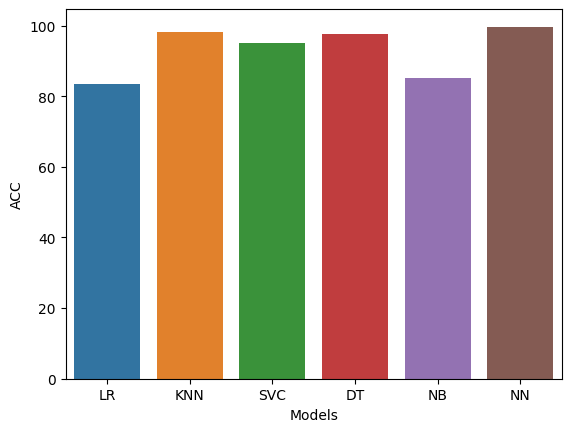

In [ ]:
sns.barplot(x='Models', y='ACC', data=final_data)